## Authenticate to Colab, Cloud and GEE

In [1]:
from google.colab import drive
from google.colab import files
import sys

drive.mount('/content/gdrive/', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/Classification/USA/Imperial_2'
model_dir = base_dir + 'models/'
IMAGES_PATH = base_dir + '/' + 'Imperial_2016_28c/'

sys.path.append(base_dir) 

Mounted at /content/gdrive/


## Import Libraries

In [2]:
import tensorflow as tf
from os import listdir
from os.path import isfile, join
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
print(tf.__version__)
import folium
print(folium.__version__)

2.4.0
0.8.3


# Initialize global variables and functions

In [3]:
LABEL = 'landcover'


landcovers = ["Alfalfa", "Other Pasture", "Lettuce", "Wheat", "Onions", "Other Truck Crops", "Corn", "Other Field Crops",
             "Subtropical", "Other"]
# landcovers = ["Alfalfa", "Other Pasture", "Wheat", "Onion", "Lettuce", "Other crops","Subtropical", "Other"]
nClasses = len(landcovers)
r = 7

In [4]:
new_labels = tf.constant([8, 8, 8, 8, 9, 6, 7, 7, 9, 3, 9, 0, 1, 1, 5, 5, 5, 5, 2, 5, 5, 4, 5, 5, 5, 9, 9, 9], dtype = tf.int32,)
# new_labels = tf.constant([6, 6, 6, 6, 7, 5, 5, 5, 7, 2, 7, 0, 1, 1, 5, 5, 5, 5, 4, 5, 5, 3, 5, 5, 5, 7, 7, 7], dtype = tf.int32)

new_labels

<tf.Tensor: shape=(28,), dtype=int32, numpy=
array([8, 8, 8, 8, 9, 6, 7, 7, 9, 3, 9, 0, 1, 1, 5, 5, 5, 5, 2, 5, 5, 4,
       5, 5, 5, 9, 9, 9], dtype=int32)>

In [5]:
train_path = IMAGES_PATH + 'training_imperial_2016_28c'
validation_path = IMAGES_PATH + 'validation_imperial_2016_28c'
test_path = IMAGES_PATH + 'testing_imperial_2016_28c'

train_file_prefix = 'training_imperial_2016'
validation_file_prefix = 'validation_imperial_2016'
test_file_prefix = 'testing_imperial_2016'

def getDatasetPaths(path, image_file_prefix):
  filesList = listdir(path = path)
  exportFilesList = [s for s in filesList if image_file_prefix in s]
  imageFilesList = []

  for f in exportFilesList:
    if f.endswith('.tfrecord.gz'):
      imageFilesList.append(f)
    elif f.endswith('.json'):
      jsonFile = f

  datasetPaths = [path + '/' + f for f in imageFilesList] 
  return datasetPaths

train_dataset_paths = getDatasetPaths(train_path, train_file_prefix)
validation_dataset_paths = getDatasetPaths(validation_path, validation_file_prefix)
test_dataset_paths = getDatasetPaths(test_path, test_file_prefix)


In [18]:
FEATURE_NAMES = []
bands =  [
          'B2', 'B3', 'B4', 'B8', 'B11','B12', 'NDVI', 'GNDVI', 'EVI',
          'SAVI', 'BSI', 'NDWI', 'NDBI'
          ]
# bands =  ['NDVI', 'GNDVI', 'EVI', 'SAVI', 'BSI', 'NDWI', 'NDBI']

# bands =  ['B2', 'B3', 'B4', 'B5', 'B6','B7']
# bands =  ['B2', 'B3', 'B4', 'B5', 'B6','B7','NDVI','EVI']

time_stamps = 9
n_features = len(bands)
# for i in range(time_stamps):
#   if i > 0:
#     s = [b + '_' + str(i) for b in bands]
#   else:
#     s = bands
#   FEATURE_NAMES.extend(s)
# FEATURE_NAMES.append(LABEL)
for i in range(2,11):
  if i > 0:
    s = [b + '_' + str(i) for b in bands]
  else:
    s = bands
  FEATURE_NAMES.extend(s)
FEATURE_NAMES.append(LABEL)
FEATURE_NAMES

['B2_2',
 'B3_2',
 'B4_2',
 'B8_2',
 'B11_2',
 'B12_2',
 'NDVI_2',
 'GNDVI_2',
 'EVI_2',
 'SAVI_2',
 'BSI_2',
 'NDWI_2',
 'NDBI_2',
 'B2_3',
 'B3_3',
 'B4_3',
 'B8_3',
 'B11_3',
 'B12_3',
 'NDVI_3',
 'GNDVI_3',
 'EVI_3',
 'SAVI_3',
 'BSI_3',
 'NDWI_3',
 'NDBI_3',
 'B2_4',
 'B3_4',
 'B4_4',
 'B8_4',
 'B11_4',
 'B12_4',
 'NDVI_4',
 'GNDVI_4',
 'EVI_4',
 'SAVI_4',
 'BSI_4',
 'NDWI_4',
 'NDBI_4',
 'B2_5',
 'B3_5',
 'B4_5',
 'B8_5',
 'B11_5',
 'B12_5',
 'NDVI_5',
 'GNDVI_5',
 'EVI_5',
 'SAVI_5',
 'BSI_5',
 'NDWI_5',
 'NDBI_5',
 'B2_6',
 'B3_6',
 'B4_6',
 'B8_6',
 'B11_6',
 'B12_6',
 'NDVI_6',
 'GNDVI_6',
 'EVI_6',
 'SAVI_6',
 'BSI_6',
 'NDWI_6',
 'NDBI_6',
 'B2_7',
 'B3_7',
 'B4_7',
 'B8_7',
 'B11_7',
 'B12_7',
 'NDVI_7',
 'GNDVI_7',
 'EVI_7',
 'SAVI_7',
 'BSI_7',
 'NDWI_7',
 'NDBI_7',
 'B2_8',
 'B3_8',
 'B4_8',
 'B8_8',
 'B11_8',
 'B12_8',
 'NDVI_8',
 'GNDVI_8',
 'EVI_8',
 'SAVI_8',
 'BSI_8',
 'NDWI_8',
 'NDBI_8',
 'B2_9',
 'B3_9',
 'B4_9',
 'B8_9',
 'B11_9',
 'B12_9',
 'NDVI_9',
 'GNDVI_9

# Data preparation and pre-processing

In [19]:
# List of fixed-length features, all of which are float32.
from pprint import pprint
import numpy as np
# z = np.zeros(91,).tolist()

columns = [
  tf.io.FixedLenSequenceFeature(shape=[r,r], dtype=tf.float32, allow_missing = True) for k in FEATURE_NAMES
]
# Dictionary with names as keys, features as values.
from collections import OrderedDict 

# featuresDict = dict(zip(FEATURE_NAMES, columns))
featuresDict = OrderedDict(zip(FEATURE_NAMES, columns))

# pprint(featuresDict)

In [20]:
# Create a dataset from the TFRecord file in Cloud Storage.

depth = len(FEATURE_NAMES)-1
def toTuple(data, label):
  spectral = []
  for i in range(0, depth, n_features):
    band_values = []
    for f in FEATURE_NAMES[i:i+n_features]:
      # if f.startswith('B'):
      #   band_values.append((tf.reshape(data[f],(r,r))[3,3])/10000)
      # else:
      band_values.append(tf.reshape(data[f],(r,r))[3,3])
    spectral.append(band_values)
  
  # spectral = tf.transpose(spectral, [2,3,0,1])
  label = tf.gather(new_labels, label)

  return spectral, label


def parse_tfrecord(example_proto):
  parsed_features = tf.io.parse_single_example(example_proto, featuresDict)
  labels = parsed_features.pop(LABEL)
  labels = tf.cast(labels, tf.int32)
  label = tf.math.argmax(tf.math.bincount(labels))
  return parsed_features, label

def getDataset(datasetPaths):
  dataset = tf.data.TFRecordDataset(datasetPaths, compression_type='GZIP')
  parsedDataset = dataset.map(parse_tfrecord, num_parallel_calls=5)
  inputDataset = parsedDataset.map(toTuple)
  return inputDataset

trainDataset = getDataset(train_dataset_paths)
validationDataset = getDataset(validation_dataset_paths)
testDataset = getDataset(test_dataset_paths)
alltestDataset = validationDataset.concatenate(testDataset)

In [21]:
for data, target in testDataset.take(5):
  print(data.shape)
  # print(data)
  print(target)

(9, 13)
tf.Tensor(0, shape=(), dtype=int32)
(9, 13)
tf.Tensor(1, shape=(), dtype=int32)
(9, 13)
tf.Tensor(2, shape=(), dtype=int32)
(9, 13)
tf.Tensor(0, shape=(), dtype=int32)
(9, 13)
tf.Tensor(5, shape=(), dtype=int32)


# 1D CNN

In [14]:
# pad = 'same'
# l2 = 0
# l1 = 0

# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape = (time_stamps,n_features),),
    
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, activation = 'relu', padding = pad, kernel_regularizer=tf.keras.regularizers.L1L2(l2 = l2, l1 = l1)),
#     tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, activation = 'relu', padding = pad, kernel_regularizer=tf.keras.regularizers.L1L2(l2 = l2, l1 = l1)),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, activation = 'relu', padding = pad, kernel_regularizer=tf.keras.regularizers.L1L2(l2 = l2, l1 = l1)),
#     tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, activation = 'relu', padding = pad, kernel_regularizer=tf.keras.regularizers.L1L2(l2 = l2, l1 = l1)),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.BatchNormalization(),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(128, activation = 'relu',  kernel_regularizer=tf.keras.regularizers.L1L2(l2 = l2, l1 = l1)),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])
# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 12, 13)            52        
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 12, 64)            2560      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 12, 64)            12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 6, 64)             256       
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 128)            4

In [22]:
input =  tf.keras.layers.Input(shape = (time_stamps,n_features))
x = tf.keras.layers.BatchNormalization()(input)
x =  tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'valid')(x)
x1 = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
x2 = tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'valid')(x)
x3 = tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'valid')(x)
x = tf.keras.layers.concatenate([x1, x2, x3], axis = 1)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'valid')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x =  tf.keras.layers.Conv1D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'valid')(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(10, activation = 'softmax')(x)
model = tf.keras.Model(input, x)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 9, 13)]      0                                            
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 9, 13)        52          input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 7, 64)        2560        batch_normalization_6[0][0]      
__________________________________________________________________________________________________
max_pooling1d_5 (MaxPooling1D)  (None, 3, 64)        0           conv1d_19[0][0]                  
____________________________________________________________________________________________

In [ ]:
batch_size = 128
num_epochs = 10

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.9, patience=2, min_lr=1e-10, min_delta=0.01, verbose = 1)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    model_dir + '/model4_conv1d_2016_12x13_10c', monitor='val_accuracy', verbose=0, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch',
    options=None
)

optim = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy']) 

history = model.fit(trainDataset.batch(batch_size), 
                    batch_size=batch_size, 
                    epochs=num_epochs, verbose=1,
                    validation_data = alltestDataset.batch(batch_size),
                    callbacks = [reduce_lr, 
                                 model_checkpoint_callback
                                 ]
)

In [29]:
model = tf.keras.models.load_model(model_dir + '/model3_conv1d_2016_12x13_10c') #79.46%


In [25]:
model.evaluate(alltestDataset.batch(1000))

135/135 [==============================] - 76s 554ms/step - loss: 1.1421 - accuracy: 0.7946


[1.142118215560913, 0.7946150898933411]

## Analysis

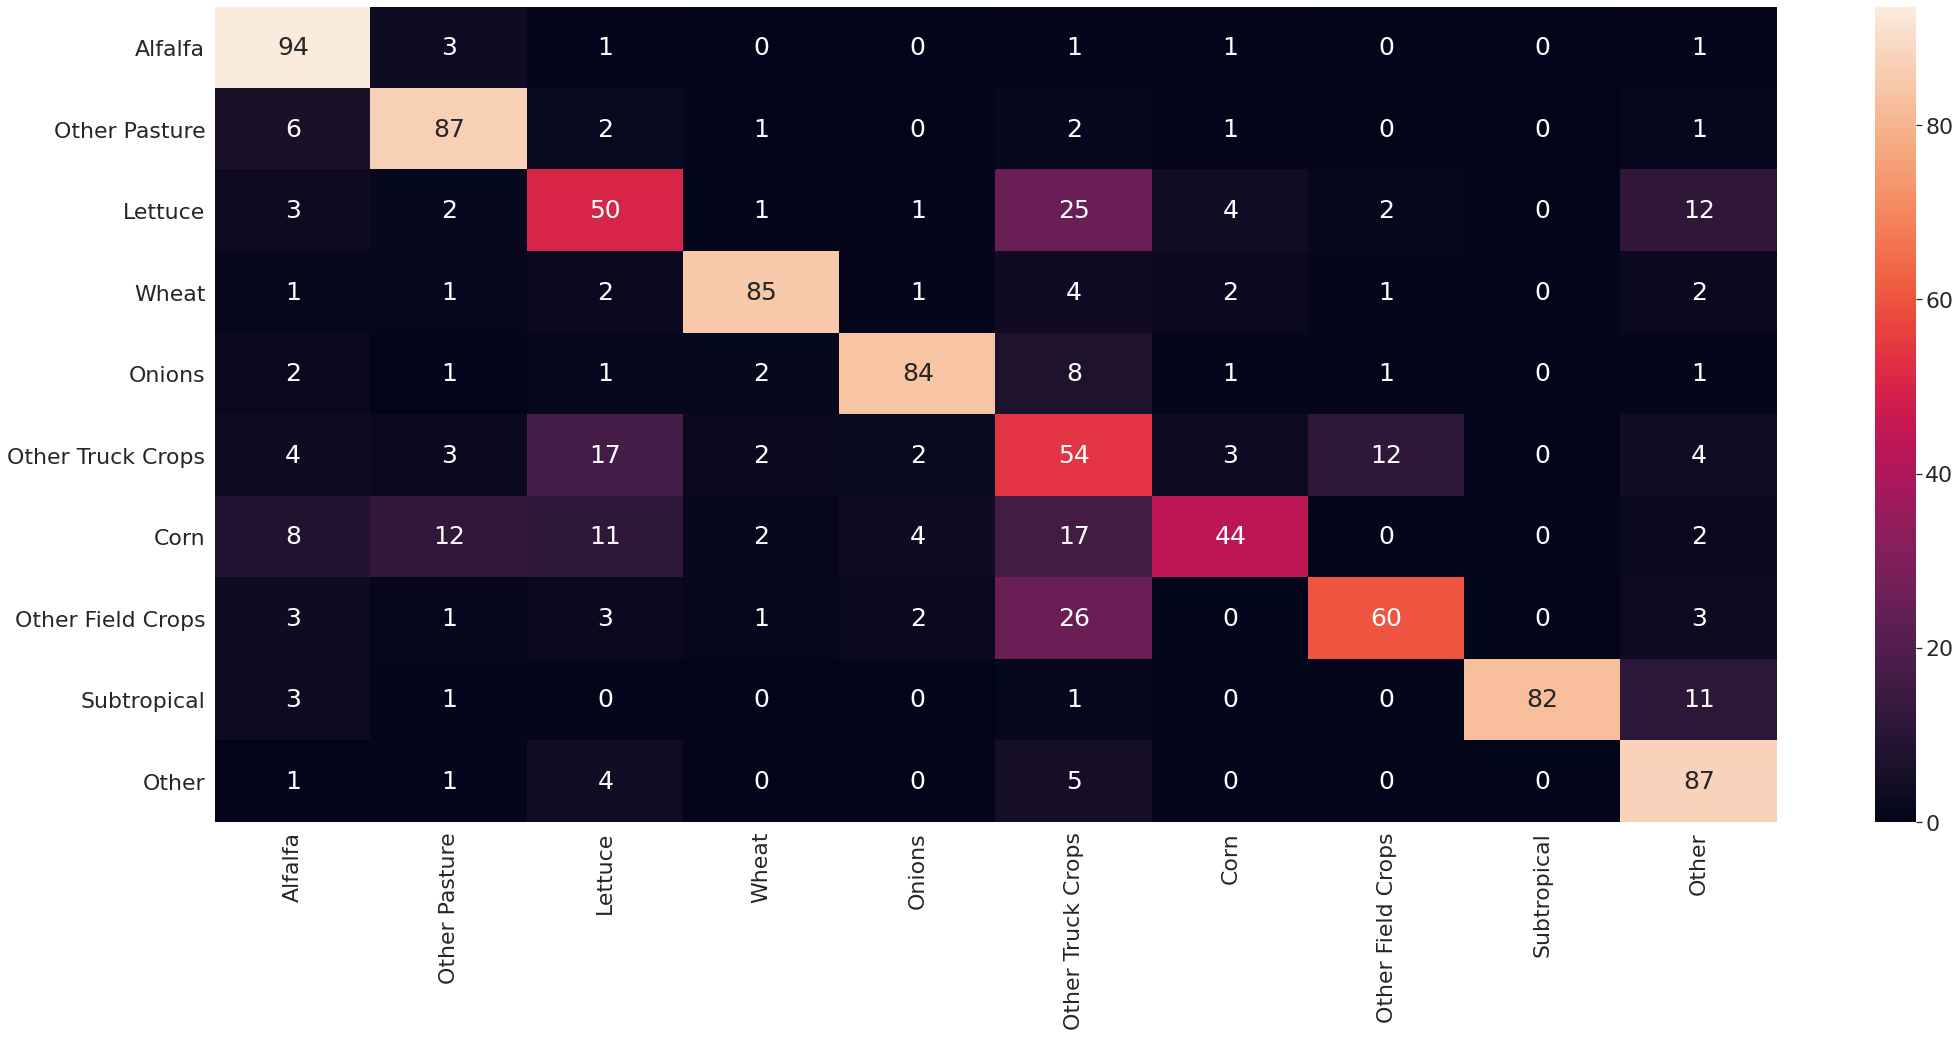

In [27]:
# y_pred = np.argmax(model.predict(alltestDataset.batch(1000)),axis = 1)
# y_true = tf.concat([y for x, y in alltestDataset], axis=0)

# cf = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

# print(cf)
# s = np.sum(cf, axis = 1)

# cf1 = pd.DataFrame(cf/(s.reshape(nClasses-1, 1)), columns=landcovers[:-1], index = landcovers[:-1])
cf1 = pd.DataFrame((cf/(s.reshape(10, 1)))*100, columns=landcovers, index = landcovers)

plt.figure(figsize = (35,15))
sns.set(font_scale=2) 
sns.heatmap(cf1, annot=True, annot_kws={"size": 25},fmt = '.0f');

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average = 'weighted')

0.8779666058642979